In [917]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
print('Package Imported')

Package Imported


### Data

In [918]:
df=pd.read_csv('algerian_forest_fires_dataset.csv',header=1)
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire


# We will be predicting the temprature. Hence our temprature will be a output feature and rest all will be a input feature

### Data cleaning & EDA

In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [920]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### The dataset that we are having is for two region, from 0-121, it is for one region and from 122 onwars, it is for another region. Hence we will make a new column called class to divide the data set into 0 and 1

In [921]:
df.shape

(244, 14)

In [922]:
class1 = []
a = 0
b = 1
for i in range(len(df)):
    if i < 122:
        class1.append(a)
    else:
        class1.append(b)
region=np.array(class1)
df["region"]=region
df[df["region"]==0]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0


In [923]:
df["region"]=df["region"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    int32  
dtypes: float64(5), int32(1), int64(6), object(3)
memory usage: 27.8+ KB


### Only one row was having some Nan value in it. Hence dropping that row

In [924]:
df=df.dropna().reset_index(drop=True)
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [925]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [926]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Data Type Conversion

In [927]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int) 

In [928]:
objects= [features for features in df.columns if df[features].dtypes =='O']
objects

['DC', 'FWI', 'Classes']

In [929]:
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


### Saving cleaned data to csv

In [931]:
df.to_csv('algerian_forest_cleaned.csv')

### Droping the un necessary columns

In [932]:
df=df.drop(['day','month','year'],axis=1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


### Encoding the Object type Classes value 

In [933]:
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           2
not fire           1
not fire           1
Name: Classes, dtype: int64

In [934]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


### Heatmap

<AxesSubplot:>

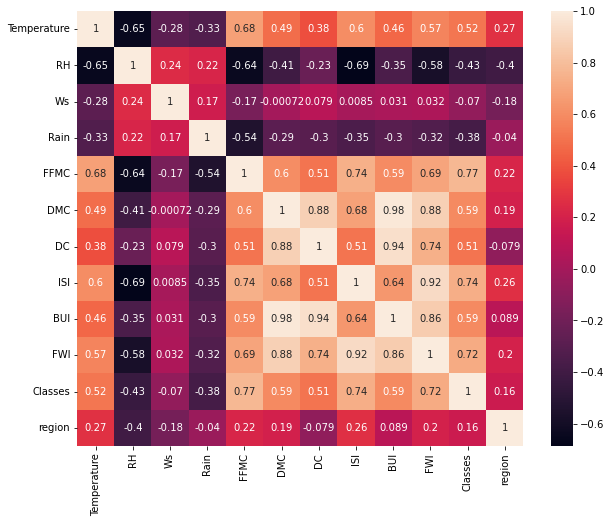

In [935]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### Selecting the dependent and Independent features

In [936]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


### Test Train Split

In [937]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


### Making the correlation matrix to find the highly correlated features above a given threshold

In [938]:
correlation_matrix=X.corr()

In [939]:
def correlation(dataset,corr):
    col_names=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=corr:
                col_name=corr_matrix.columns[i]
                col_names.add(col_name)
    return col_names

In [940]:
correlated_features=list(correlation(X_train,0.85))
correlated_features

['BUI', 'DC']

### Visualisation the trend of highly correlated features

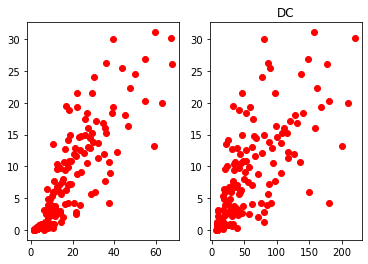

In [941]:
fig,ax=plt.subplots(1,len(correlated_features))
for i in range(0,len(correlated_features)):
  ax[i].scatter(X_train[correlated_features[i]],y_train,c='r')
  plt.title(correlated_features[i])

In [942]:
for i in range(0,len(correlated_features)):
    X_train.drop(correlated_feature[i],axis=1,inplace=True)
    X_test.drop(correlated_features[i],axis=1,inplace=True)
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 192           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   0.2        0       0
 14            28  80  17   3.1  49.4   3.0   0.4        0       0
 92            25  76  17   7.2  46.0   1.3   0.2        0       0
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 102           30  77  21   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  region
 24            31  64  15   0.0  86.7  14.2  5.7        1       0
 6             33  54  13   0.0  88.2

### Standard Scaling

In [943]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train.shape,X_test.shape,X_train_scaled,X_test_scaled

((182, 9),
 (61, 9),
 array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]]),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070

Text(0.5, 1.0, 'Boxplot after Scalling')

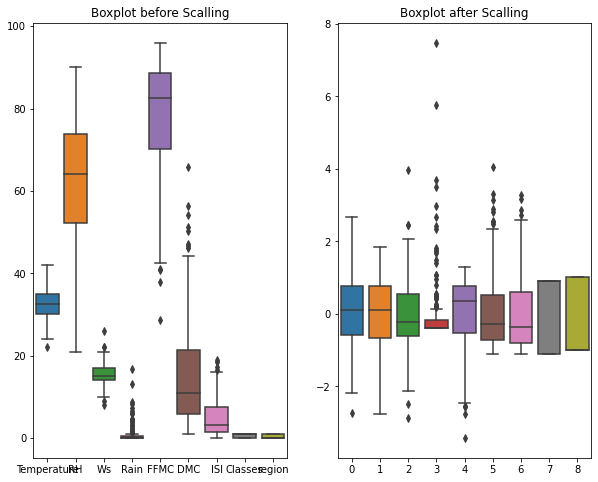

In [944]:
plt.subplots(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Boxplot before Scalling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot after Scalling')

# Regression


### 1. Linear Regression

In [945]:
L_Regressor= LinearRegression()
L_Regressor.fit(X_train_scaled,y_train)
y_pred=L_Regressor.predict(X_test_scaled)
li_r2_score=r2_score(y_test,y_pred)
li_mse=mean_squared_error(y_test,y_pred)
li_r2_score,li_mse

(0.9847657384266951, 0.6742766873791602)

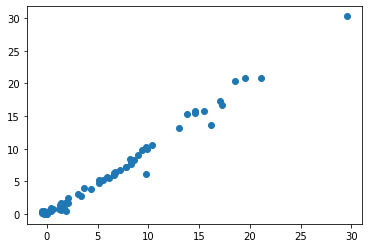

In [946]:
plt.scatter(y_pred,y_test)

<BarContainer object of 9 artists>

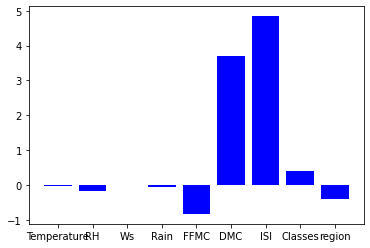

In [947]:
li_coef=list(L_Regressor.coef_)
li_coef
plt.bar(X_train.columns,li_coef,color='b')

### Lasso Regression

In [948]:
Lso_Regressor= Lasso()
Lso_Regressor.fit(X_train_scaled,y_train)
y_pred=Lso_Regressor.predict(X_test_scaled)
la_r2_score= r2_score(y_test,y_pred)
la_mse= mean_squared_error(y_pred,y_test)
la_r2_score,la_mse

(0.9492020263112388, 2.248345891897475)

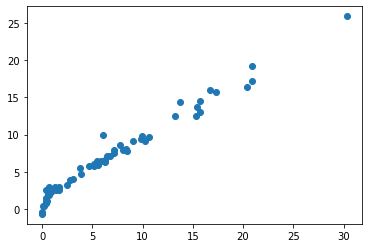

In [949]:
plt.scatter(y_test,y_pred)

<BarContainer object of 9 artists>

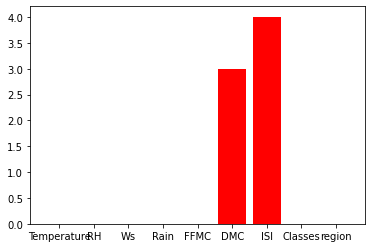

In [950]:
lasso_coef=list(Lso_Regressor.coef_)
lasso_coef
plt.bar(X_train.columns,lasso_coef,color='r')

### Cross Validation lasso

In [951]:
lcv_regressor= LassoCV(cv=5)
lcv_regressor.fit(X_train_scaled,y_train)
lcv_regressor.predict(X_test_scaled)
lcv_r2_score= r2_score(y_pred,y_test)
lcv_mse=mean_squared_error(y_pred,y_test)
lcv_mse,lcv_r2_score

(2.248345891897475, 0.9264742326805692)

<BarContainer object of 9 artists>

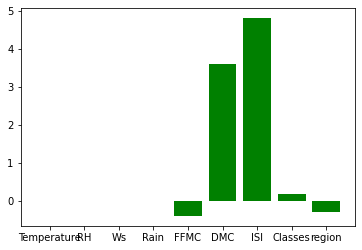

In [952]:
lcv_coef=list(lcv_regressor.coef_)
plt.bar(X_train.columns,lcv_coef,color='green')

In [953]:
lcv_regressor.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

### RidgeCV Regression

Mean  error <function mean_squared_error at 0x000002AB39100550>
R2 Score 0.9842993364555513


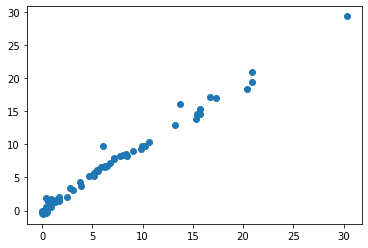

In [954]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_pred,y_test)
print("Mean  error", mean_squared_error)
print("R2 Score", score)

<BarContainer object of 9 artists>

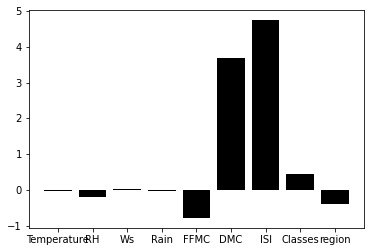

In [955]:
ridgecv_coef=list(ridgecv.coef_)
plt.bar(X_train.columns,ridgecv_coef,color='k')

### Elastic_Net= Lasso+ Ridge


In [956]:
el_regressor= ElasticNet()
el_regressor.fit(X_train_scaled,y_train)
el_regressor.predict(X_test_scaled)
el_score=r2_score(y_test,y_pred)
el_mse=mean_squared_error(y_pred,y_test)
el_score,el_mse

(0.9842993364555513, 0.6949198918152052)

<BarContainer object of 9 artists>

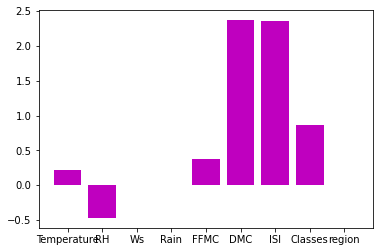

In [957]:
el_coef=el_regressor.coef_
plt.bar(X_train.columns,el_coef,color='m')

In [958]:
x=X_train.columns
y1=li_coef
y2=lasso_coef
y3=lcv_coef
y4=ridgecv_coef
y5=el_coef
width=0.2

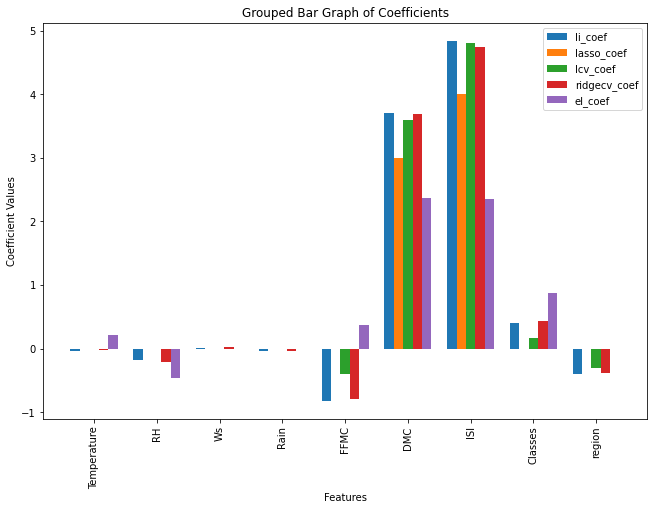

In [959]:
import numpy as np
import matplotlib.pyplot as plt

x = X_train.columns
y1 = li_coef
y2 = lasso_coef
y3 = lcv_coef
y4 = ridgecv_coef
y5 = el_coef

bar_width = 0.15
index = np.arange(len(x))
plt.figure(figsize=(10,8))

plt.bar(index, y1, bar_width, label='li_coef')
plt.bar(index + bar_width, y2, bar_width, label='lasso_coef')
plt.bar(index + 2 * bar_width, y3, bar_width, label='lcv_coef')
plt.bar(index + 3 * bar_width, y4, bar_width, label='ridgecv_coef')
plt.bar(index + 4 * bar_width, y5, bar_width, label='el_coef')

plt.xticks(index + 2 * bar_width, x, rotation=90)


plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Grouped Bar Graph of Coefficients')
plt.legend()


plt.tight_layout(pad=4)
plt.show()
